# Basics and Notation


- **Regression** is the single most important tool at the econometrician's disposal
- **Regression analysis** is concerned with the description and evaluation of the relationship between a variable typically called the dependent variable, and one or more other variables, typically called the independent or explanatory variables.
- Alternative vocabulary:
    
| y | x |
| :----- | :----- |
| dependent variable | independent variables |
| regressand | regressors |
| effect variable | causal variables |
| explained variable | explanatory variables |
| | features |


### The regression "model" and terminology

Suppose you want to describe the relationship between two variables, y and X. You might model that relationship as a straight line:

$$ 
y=a+\beta x
$$

But that line can't exactly fit all the points of data, so you need to account for the discrepancies, and so we add a "error term" or "disturbance" denoted by $u$

$$ 
y=a+\beta x+u
$$ 

Now, we want to estimate $a$ and $\beta$ to best "fit" the data. Imagine you pick/estimate $\hat{a}$ and $\hat{\beta}$  to fit the data. If you apply that to all the X data points like $\hat{a} + \hat{\beta}x$ , then you get a **predicted value for $y$**:

$$ 
\hat{y} = \hat{a} + \hat{\beta}x
$$ 

We call $\hat{y}$ the "fitted values" or the "predicted values" of y. And the difference between each actual $y$ and the predicted $\hat{y}$ is called the **residual** or **error**:

$$ 
y-\hat{y} = \hat{u} = \text{"residual" aka "error"}
$$ 

You can see all this visually in this graph, where I've plotted some X and y variable, and decided to see how well a line with  $\hat{\alpha}=8$ and $\hat{\beta}=1.5$ fit it:


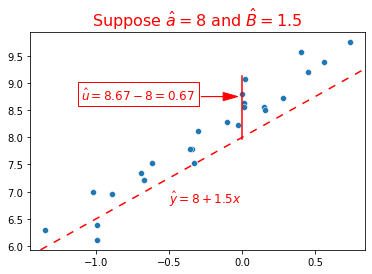

In [92]:
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.lines as lines

diamonds2 = (sns.load_dataset('diamonds')
             .query('carat < 2.5')               # censor/remove outliers
             .assign(lprice = np.log(diamonds['price']),
                     lcarat = np.log(diamonds['carat']),
                     const = 1)   
             .sample(25,random_state = 20) 
            )

fig, ax = plt.subplots()
sns.scatterplot(x='lcarat',y='lprice',data=diamonds2,ax=ax).set(ylabel="",xlabel="")
plt.axline((0, 8), slope=1.5, color="red", linestyle=(0, (5, 5)))
plt.text(-.5,6.8,'$\hat{y}=8+1.5x$',color='red',size=12)
plt.axvline(0,.51,.8,color='red')
plt.title("Suppose $\hat{a}=8$ and $\hat{B}=1.5$ ", color='red',size=16)
plt.text(-1.1,8.7,'$\hat{u}=8.67-8=0.67$',color='red',size=12,bbox=dict(facecolor='none', edgecolor='red'))
plt.arrow(-.28,8.75,.15,0,color='red',head_length=.1,head_width=.15)
plt.show()
# fig.add_artist(lines.Line2D([-1, 6.5], [0.5, 9]))             


So after you pick an $\hat{a}$ and $\hat{\beta}$, you compute the vertical distance between the fitted line and every point. 

The goal of estimation (any estimation, including regression) is to make these errors as "small" as possible. Regression is aka'ed as "Ordinary Least Squares" which as it sounds, takes those errors, squares them, adds those up, and minimizes the sum

$$ \min \sum(y-\hat{y})^2 $$

and we can substitute $\hat{y}$ in to that and get:

$$ \min \sum(y-\hat{a} + \hat{\beta}x)  $$

By solving this problem, you're in essence "plotting" a bunch of these lines (with corresponding slopes and intercepts), and each time, you get the error for each datapoint ($\hat{u}$), and choosing the line that fits the data the best. 

So, to combine this with the ["Modeling process" page](01b_model_process), regression follows the same steps as any estimation:
1. Select a model. _In a regression, the model is a line (if you only have 1 X variable) or a hyperplane (if you have many X variables)._
2. Select a loss function. _In a regression, it's the sum of squared errors._
3. Minimize the loss. _You can solve the minimum analytically (take the derivative, ...) or numerically (gradient descent). But good news: The python packages  we use handle this for you._

Here, the actual regression line is different than what I plotted above, and your eyes probably agree that the blue line fits it quite well!

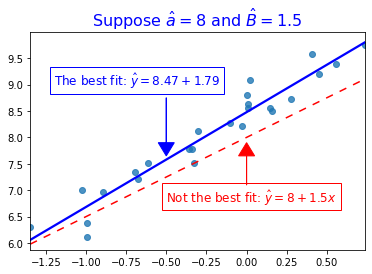

In [113]:
fig, ax = plt.subplots()
sns.regplot(x='lcarat',y='lprice',data=diamonds2,ax=ax,ci=None,
            line_kws={'color':'blue'}).set(ylabel="",xlabel="")
plt.axline((0, 8), slope=1.5, color="red", linestyle=(0, (5, 5)))
plt.text(-.5,6.8,'Not the best fit: $\hat{y}=8+1.5x$',color='red',size=12,bbox=dict(facecolor='none', edgecolor='red'))
plt.text(-1.2,9,'The best fit: $\hat{y}=8.47+1.79$',color='blue',size=12,bbox=dict(facecolor='none', edgecolor='blue'))

plt.title("Suppose $\hat{a}=8$ and $\hat{B}=1.5$ ", color='blue',size=16)
# plt.text(-1.1,8.7,'$\hat{u}=8.67-8=0.67$',color='red',size=12,bbox=dict(facecolor='none', edgecolor='red'))
plt.arrow(-.5,8.75,0,-.85,color='blue',head_length=.25,head_width=.1)
plt.arrow(0,7.1,0,.55,color='red',head_length=.25,head_width=.1)
plt.show()

